# Introduction

This notebook is intended for use in preparing input files for the Motor Vehicle Emission Simulator (MOVES) model. Required input files for this notbook come from the Travel Demand Model (TDM), the Utah Department of Air Quality (DAQ), and Kip (Refine this when I understand where this actually comes from). 

# Define Model Parameters

In [8]:
# Modeled Year
year = 2050




# Step 1: Setup

## Step 1a: Import relevant libraries

In [9]:
#Import all relevant libraries
import pandas as pd
import geopandas as gpd
import numpy as np
import pathlib
#import matplotlib
#from sqlalchemy.engine import create_engine
#import sqlite3
#from pandas.io import sql
#Need to install ipython-sql for this to work
#import subprocess
#%load_ext sql

pd.options.mode.copy_on_write = True

## Step 1b: Read in TDM Output

In [10]:
#List Input Folder and TDM File Paths:
input_dir = r"C:\Users\jlillywhite\Documents\GitHub\MOVES_Input_Creation\Input"
tdm_filename = "TDM_SummarywithFactors2050_v2.csv"

#Create filepath
tdm_filepath = pathlib.Path(input_dir,tdm_filename)

#Create TDM Output File Dataframe
tdm_output = pd.read_csv(tdm_filepath)

#View Data
display(tdm_output)


,A,B,FT,SFF,County_FIPS,CITY_FIPS,AWDT_DY,AADT_DY,VMT_JAN,VMT_JUL,...,EV_VMT_W,AM_VMT_S,MD_VMT_S,PM_VMT_S,EV_VMT_S,LANES,AM_VC,MD_VC,PM_VC,EV_VC
0,1,29685,1,30.0,3,0,0.0,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,7,0.000,0.000,0.000,0.000
1,2,29685,1,30.0,3,0,250.0,266.52451,22.14966,29.35170,...,4.73702,5.72663,9.58110,5.94689,6.27727,7,0.000,0.000,0.000,0.000
2,3,29645,1,30.0,3,0,111.0,118.33688,46.86178,62.09904,...,10.69208,9.97053,21.51536,12.59436,14.16865,7,0.000,0.000,0.000,0.000
3,4,29671,1,30.0,3,0,18.0,19.18977,3.72911,4.94165,...,0.77731,1.03006,2.06012,0.51503,1.03006,7,0.000,0.000,0.000,0.000
4,5,29680,1,30.0,3,0,378.0,402.98508,90.78207,120.30016,...,20.95048,21.49363,38.50942,25.07590,27.76260,7,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49416,95063,95008,15,43.0,49,0,8632.0,8292.02734,206.04791,321.34933,...,47.33719,79.60075,107.23236,73.86515,73.82640,2,0.401,0.280,0.386,0.099
49417,95064,95025,7,15.0,49,0,199.0,212.15352,245.72325,325.62100,...,52.12049,65.99798,99.76438,70.60249,69.06765,1,0.056,0.045,0.063,0.016
49418,95064,95026,7,15.0,49,0,146.0,155.65031,999.66357,1324.70752,...,231.20987,212.76981,408.51804,314.89932,306.38852,1,0.029,0.032,0.042,0.012
49419,95064,95056,7,15.0,49,0,0.0,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,1,0.000,0.000,0.000,0.000


## Step 1c: Read in DAQ files

## Step 1d: Read in Files from Kip (mix, hpms factor, pop factor)

In [11]:
#Read in Input Files
#List Input File Paths:
mix_filename = "mix_2023.csv"
hpms_filename = "hpms_factor_2019.csv"
# not used pop_filename = "pop_factor_2022.csv"
road_filename = 'road.csv'
# not used road_dist_county_template_filename = 'road_dist_county_template.csv'
source_type_pop_filename = 'sourcetypepopulation_2022_4.csv'
county_filename = 'county.csv'


#Create filepaths
mix_path = pathlib.Path(input_dir,mix_filename)
hpms_path = pathlib.Path(input_dir,hpms_filename)
# not used pop_path = pathlib.Path(input_dir,pop_filename)
road_path = pathlib.Path(input_dir,road_filename)
#road_dist_county_path = pathlib.Path(input_dir,road_dist_county_template_filename)
source_type_pop_path = pathlib.Path(input_dir,source_type_pop_filename)
county_filepath = pathlib.Path(input_dir,county_filename)

#Create dataframes

mix_df = pd.read_csv(mix_path)
hpms_df = pd.read_csv(hpms_path)
# it appears that Shauna hasn't been using this one? pop_df = pd.read_csv(pop_path)
road_df = pd.read_csv(road_path)
# road_dist_county_df = pd.read_csv(road_dist_county_path)
source_type_pop_df = pd.read_csv(source_type_pop_path)
county_df = pd.read_csv(county_filepath)


In [12]:
#View Mix File
display(mix_df)

,Index,Year,GeoID_WFRC,County_FIPS,GeoID_text,roadType,dummy,veh_11,veh_21,veh_31,...,veh_41,veh_42,veh_43,veh_51,veh_52,veh_53,veh_54,veh_61,veh_62,Total
0,BV_1990,1990,0,1,BV,4,1990,0.00163,0.55448,0.17222,...,0.00471,0.00123,0.00331,0.00169,0.05492,0.00436,0.00567,0.04869,0.13292,1
1,BV_1990,1990,0,1,BV,5,1990,0.00195,0.66387,0.20619,...,0.00203,0.00053,0.00143,0.00073,0.02368,0.00188,0.00244,0.02099,0.05731,1
2,BV_1990,1990,0,1,BV,55,1990,0.00217,0.73744,0.22904,...,0.00023,0.00006,0.00016,0.00008,0.00267,0.00021,0.00028,0.00236,0.00645,1
3,BV_1999,1999,0,1,BV,4,1999,0.00153,0.43161,0.2859,...,0.00474,0.00132,0.0029,0.00163,0.05401,0.00345,0.00454,0.04321,0.14167,1
4,BV_1999,1999,0,1,BV,5,1999,0.00183,0.51673,0.34229,...,0.00205,0.00057,0.00125,0.0007,0.02329,0.00149,0.00196,0.01863,0.06108,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5477,WE_2059,2059,0,57,WE,55,2059,0.0026,0.30209,0.6205,...,0.00056,0.0002,0.00026,0.0001,0.00611,0.00041,0.00044,0.00254,0.00279,1
5478,WE_2060,2060,0,57,WE,4,2060,0.00236,0.27178,0.56408,...,0.00442,0.00158,0.00207,0.00079,0.04867,0.00324,0.00347,0.01989,0.02184,1
5479,WE_2060,2060,0,57,WE,5,2060,0.00252,0.28985,0.60158,...,0.00194,0.00069,0.00091,0.00035,0.02137,0.00142,0.00153,0.00873,0.00959,1
5480,WE_2060,2060,0,57,WE,55,2060,0.0026,0.29992,0.62246,...,0.00056,0.0002,0.00026,0.0001,0.00617,0.00041,0.00044,0.00252,0.00277,1


In [13]:
#Since HPMS Factors are County-Specific, delete duplicate values
hpms_df=hpms_df.replace(to_replace=r"\N",value=0)
hpms_df=hpms_df.drop_duplicates(subset=['County_FIPS'])

hpms_df.rename(columns={'City_FIPS': 'CITY_FIPS'}, inplace=True)
display(hpms_df)

,GeoID_WFRC,County_FIPS,CITY_FIPS,GeoID_text,HPMSF,HPMSR,HPMSL,HPMSA
0,1,57,0,WE,0.9553,0.9553,2.3454,0.9805
1,2,11,0,DA,0.9629,0.9629,2.4213,1.0782
2,3,35,0,SL,0.9624,0.9624,2.7055,1.0181
3,4,49,0,UT,1.0328,1.0328,2.7675,0.8969
4,55980,55980,55980,OG,0.8801,0.8801,3.5816,0.9931
7,1002,45,0,TO,1.1703,1.1703,3.6889,1.0460
8,1001,3,0,BE,0.8091,0.8091,1.7783,0.9957


In [14]:
#View Pop Factor
#display(source_type_pop_df)

In [15]:
#View Road Table
#display(road_df)

In [16]:
#View Road District County Template Table
#display(road_dist_county_df)

# Step 2: Processing

## Step 2a: Calculate Factors from TDM

In [39]:
# Filter TDM Data to county of interest (If desired)
#tdm = tdm_output[tdm_output['County_FIPS']== county_fips]
tdm = tdm_output.copy()

# Create "Link_ID" field
tdm["link_ID"] = tdm["A"].astype(str) + "_" + tdm["B"].astype(str)

# Create "year_ID" field
tdm["year_ID"] = year

#Set "road_type" field based on input "road.csv" file
tdm = tdm.merge(road_df, on='FT')

#The SQL script inserts ogden as a separate county here
tdm_ogden = tdm.where(tdm['CITY_FIPS']==55980)
tdm_ogden.dropna(inplace=True)
tdm_ogden['County_FIPS'] = 55980

#Add Ogden to end of TDM Dataframe
tdm = pd.concat([tdm, tdm_ogden], ignore_index=True)

#Reassign local roads to match Arterials
tdm['roadtype_ID2345'] = tdm['RoadType'].where(tdm['RoadType'] != 55, other=5)
if 'COUNTY_FIP' in tdm.columns: tdm.rename(columns={"COUNTY_FIP":"County_FIPS"}, inplace=True)
display(tdm)


,A,B,FT,SFF,County_FIPS,CITY_FIPS,AWDT_DY,AADT_DY,VMT_JAN,VMT_JUL,...,EV_VMT_S,LANES,AM_VC,MD_VC,PM_VC,EV_VC,link_ID,year_ID,RoadType,roadtype_ID2345
0,1.0,29685.0,1.0,30.0,3,0.0,0.0,0.00000,0.00000,0.00000,...,0.00000,7.0,0.000,0.000,0.000,0.000,1_29685,2050.0,55.0,5.0
1,2.0,29685.0,1.0,30.0,3,0.0,250.0,266.52451,22.14966,29.35170,...,6.27727,7.0,0.000,0.000,0.000,0.000,2_29685,2050.0,55.0,5.0
2,3.0,29645.0,1.0,30.0,3,0.0,111.0,118.33688,46.86178,62.09904,...,14.16865,7.0,0.000,0.000,0.000,0.000,3_29645,2050.0,55.0,5.0
3,4.0,29671.0,1.0,30.0,3,0.0,18.0,19.18977,3.72911,4.94165,...,1.03006,7.0,0.000,0.000,0.000,0.000,4_29671,2050.0,55.0,5.0
4,5.0,29680.0,1.0,30.0,3,0.0,378.0,402.98508,90.78207,120.30016,...,27.76260,7.0,0.000,0.000,0.000,0.000,5_29680,2050.0,55.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51258,29733.0,444.0,1.0,20.0,55980,55980.0,1217.5,1089.97314,381.67838,435.15649,...,186.84244,7.0,0.001,0.001,0.001,0.001,29733_444,2050.0,55.0,5.0
51259,29733.0,28548.0,4.0,28.0,55980,55980.0,1744.5,1624.30164,529.54718,564.77454,...,181.50096,1.0,0.156,0.161,0.163,0.070,29733_28548,2050.0,5.0,5.0
51260,29737.0,28668.0,4.0,34.0,55980,55980.0,2895.8,2592.47974,335.18637,382.15033,...,80.49910,1.0,0.384,0.193,0.466,0.069,29737_28668,2050.0,5.0,5.0
51261,90012.0,29125.0,3.0,35.0,55980,55980.0,5339.0,4779.76709,539.69122,615.30896,...,129.37566,1.0,0.579,0.336,0.400,0.097,90012_29125,2050.0,5.0,5.0


In [40]:
#Merge HPMS Factors onto TDM
tdm = pd.merge(tdm,hpms_df,on='County_FIPS')
                                                                              
display(tdm)


,A,B,FT,SFF,County_FIPS,CITY_FIPS_x,AWDT_DY,AADT_DY,VMT_JAN,VMT_JUL,...,year_ID,RoadType,roadtype_ID2345,GeoID_WFRC,CITY_FIPS_y,GeoID_text,HPMSF,HPMSR,HPMSL,HPMSA
0,1.0,29685.0,1.0,30.0,3,0.0,0.0,0.00000,0.00000,0.00000,...,2050.0,55.0,5.0,1001,0,BE,0.8091,0.8091,1.7783,0.9957
1,2.0,29685.0,1.0,30.0,3,0.0,250.0,266.52451,22.14966,29.35170,...,2050.0,55.0,5.0,1001,0,BE,0.8091,0.8091,1.7783,0.9957
2,3.0,29645.0,1.0,30.0,3,0.0,111.0,118.33688,46.86178,62.09904,...,2050.0,55.0,5.0,1001,0,BE,0.8091,0.8091,1.7783,0.9957
3,4.0,29671.0,1.0,30.0,3,0.0,18.0,19.18977,3.72911,4.94165,...,2050.0,55.0,5.0,1001,0,BE,0.8091,0.8091,1.7783,0.9957
4,5.0,29680.0,1.0,30.0,3,0.0,378.0,402.98508,90.78207,120.30016,...,2050.0,55.0,5.0,1001,0,BE,0.8091,0.8091,1.7783,0.9957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51258,29733.0,444.0,1.0,20.0,55980,55980.0,1217.5,1089.97314,381.67838,435.15649,...,2050.0,55.0,5.0,55980,55980,OG,0.8801,0.8801,3.5816,0.9931
51259,29733.0,28548.0,4.0,28.0,55980,55980.0,1744.5,1624.30164,529.54718,564.77454,...,2050.0,5.0,5.0,55980,55980,OG,0.8801,0.8801,3.5816,0.9931
51260,29737.0,28668.0,4.0,34.0,55980,55980.0,2895.8,2592.47974,335.18637,382.15033,...,2050.0,5.0,5.0,55980,55980,OG,0.8801,0.8801,3.5816,0.9931
51261,90012.0,29125.0,3.0,35.0,55980,55980.0,5339.0,4779.76709,539.69122,615.30896,...,2050.0,5.0,5.0,55980,55980,OG,0.8801,0.8801,3.5816,0.9931


In [41]:
# Create the HPMS dictionary
HPMS_type_dict = { 4: 'HPMSF', 5: 'HPMSA', 55: 'HPMSL'}

# Add a new column named 'HPMS_Factor_type' based on above dictionary
tdm['HPMS_factor_type'] = tdm['RoadType'].apply(lambda x: HPMS_type_dict.get(x))

# Define a function to apply to each row, selecting the right HPMS Factor column
def select_HPMS_column(row):
    column_to_select = row['HPMS_factor_type']
    return row[column_to_select]

tdm['HPMS_factor'] = tdm.apply(select_HPMS_column, axis=1)

tdm_hpms = tdm[['link_ID','RoadType','HPMSF','HPMSR','HPMSL','HPMSA', 'HPMS_factor']].copy()

display(tdm_hpms)

,link_ID,RoadType,HPMSF,HPMSR,HPMSL,HPMSA,HPMS_factor
0,1_29685,55.0,0.8091,0.8091,1.7783,0.9957,1.7783
1,2_29685,55.0,0.8091,0.8091,1.7783,0.9957,1.7783
2,3_29645,55.0,0.8091,0.8091,1.7783,0.9957,1.7783
3,4_29671,55.0,0.8091,0.8091,1.7783,0.9957,1.7783
4,5_29680,55.0,0.8091,0.8091,1.7783,0.9957,1.7783
...,...,...,...,...,...,...,...
51258,29733_444,55.0,0.8801,0.8801,3.5816,0.9931,3.5816
51259,29733_28548,5.0,0.8801,0.8801,3.5816,0.9931,0.9931
51260,29737_28668,5.0,0.8801,0.8801,3.5816,0.9931,0.9931
51261,90012_29125,5.0,0.8801,0.8801,3.5816,0.9931,0.9931


In [42]:
#Calculate Extra Fields
tdm['VMT_HPMS_W'] = tdm['VMT_JAN'] * tdm['HPMS_factor']
tdm['VMT_HPMS_S'] = tdm['VMT_JUL'] * tdm['HPMS_factor']
tdm['VHT_FF_SPD'] = tdm['VMT_JAN'] / tdm['SFF']
tdm['VHT_AM'] = tdm['AM_VMT_W'] / tdm['AM_SPD']
tdm['VHT_MD'] = tdm['MD_VMT_W'] / tdm['MD_SPD']
tdm['VHT_PM'] = tdm['PM_VMT_W'] / tdm['PM_SPD']
tdm['VHT_EV'] = tdm['EV_VMT_W'] / tdm['EV_SPD']
#Why do we define VHT only by the Winter VMT?
tdm['VHT'] = tdm['VHT_AM'] + tdm['VHT_MD'] + tdm['VHT_PM'] + tdm['VHT_EV']
tdm['VHT_Delay_AM'] = np.where(tdm['SFF']>tdm['AM_SPD'], tdm['VHT_AM'] - (tdm['AM_VMT_W'] / tdm['SFF']) , 0)
tdm['VHT_Delay_MD'] = np.where(tdm['SFF']>tdm['MD_SPD'], tdm['VHT_MD'] - (tdm['MD_VMT_W'] / tdm['SFF']) , 0)
tdm['VHT_Delay_PM'] = np.where(tdm['SFF']>tdm['PM_SPD'], tdm['VHT_PM'] - (tdm['PM_VMT_W'] / tdm['SFF']) , 0)
tdm['VHT_Delay_EV'] = np.where(tdm['SFF']>tdm['EV_SPD'], tdm['VHT_EV'] - (tdm['EV_VMT_W'] / tdm['SFF']) , 0)
#Do we need to do something to exclude centroid connectors from the lane miles calculation?
tdm['Lane_miles'] = tdm['LANES'] * tdm['DIST']
tdm['VHT_Delay'] = tdm['VHT_Delay_AM'] + tdm['VHT_Delay_MD'] + tdm['VHT_Delay_PM'] + tdm['VHT_Delay_EV']

tdm['VMT_AM_VC>1.0'] = np.where(tdm['AM_VC'] > 1, tdm['AM_VMT_W'],0)
tdm['VMT_MD_VC>1.0'] = np.where(tdm['MD_VC'] > 1, tdm['MD_VMT_W'],0)
tdm['VMT_PM_VC>1.0'] = np.where(tdm['PM_VC'] > 1, tdm['PM_VMT_W'],0)
tdm['VMT_EV_VC>1.0'] = np.where(tdm['EV_VC'] > 1, tdm['EV_VMT_W'],0)

tdm['VMT_AM_VC>1.2'] = np.where(tdm['AM_VC'] > 1.2, tdm['AM_VMT_W'],0)
tdm['VMT_MD_VC>1.2'] = np.where(tdm['MD_VC'] > 1.2, tdm['MD_VMT_W'],0)
tdm['VMT_PM_VC>1.2'] = np.where(tdm['PM_VC'] > 1.2, tdm['PM_VMT_W'],0)
tdm['VMT_EV_VC>1.2'] = np.where(tdm['EV_VC'] > 1.2, tdm['EV_VMT_W'],0)

tdm['VMT_VC>1.0'] = tdm['VMT_AM_VC>1.0'] + tdm['VMT_MD_VC>1.0'] + tdm['VMT_PM_VC>1.0'] + tdm['VMT_EV_VC>1.0']
tdm['VMT_VC>1.2'] = tdm['VMT_AM_VC>1.2'] + tdm['VMT_MD_VC>1.2'] + tdm['VMT_PM_VC>1.2'] + tdm['VMT_EV_VC>1.2']



In [44]:
#Speed Bin Calculations
tdm['AM_SPD'] = tdm['AM_SPD'].where(tdm['RoadType'] != 55, other=12.9)
tdm['MD_SPD'] = tdm['MD_SPD'].where(tdm['RoadType'] != 55, other=12.9)
tdm['PM_SPD'] = tdm['PM_SPD'].where(tdm['RoadType'] != 55, other=12.9)
tdm['EV_SPD'] = tdm['EV_SPD'].where(tdm['RoadType'] != 55, other=12.9)

tdm['AM_SPD_bin'] = np.minimum(np.ceil((tdm['AM_SPD']+2.5)/5),16)
tdm['MD_SPD_bin'] = np.minimum(np.ceil((tdm['MD_SPD']+2.5)/5),16)
tdm['PM_SPD_bin'] = np.minimum(np.ceil((tdm['PM_SPD']+2.5)/5),16)
tdm['EV_SPD_bin'] = np.minimum(np.ceil((tdm['EV_SPD']+2.5)/5),16)


display(tdm)


,A,B,FT,SFF,County_FIPS,CITY_FIPS_x,AWDT_DY,AADT_DY,VMT_JAN,VMT_JUL,...,VMT_AM_VC>1.2,VMT_MD_VC>1.2,VMT_PM_VC>1.2,VMT_EV_VC>1.2,VMT_VC>1.0,VMT_VC>1.2,AM_SPD_bin,MD_SPD_bin,PM_SPD_bin,EV_SPD_bin
0,1.0,29685.0,1.0,30.0,3,0.0,0.0,0.00000,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0,4.0
1,2.0,29685.0,1.0,30.0,3,0.0,250.0,266.52451,22.14966,29.35170,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0,4.0
2,3.0,29645.0,1.0,30.0,3,0.0,111.0,118.33688,46.86178,62.09904,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0,4.0
3,4.0,29671.0,1.0,30.0,3,0.0,18.0,19.18977,3.72911,4.94165,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0,4.0
4,5.0,29680.0,1.0,30.0,3,0.0,378.0,402.98508,90.78207,120.30016,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51258,29733.0,444.0,1.0,20.0,55980,55980.0,1217.5,1089.97314,381.67838,435.15649,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0,4.0
51259,29733.0,28548.0,4.0,28.0,55980,55980.0,1744.5,1624.30164,529.54718,564.77454,...,0.0,0.0,0.0,0.0,0.0,0.0,7.0,7.0,7.0,7.0
51260,29737.0,28668.0,4.0,34.0,55980,55980.0,2895.8,2592.47974,335.18637,382.15033,...,0.0,0.0,0.0,0.0,0.0,0.0,8.0,8.0,7.0,8.0
51261,90012.0,29125.0,3.0,35.0,55980,55980.0,5339.0,4779.76709,539.69122,615.30896,...,0.0,0.0,0.0,0.0,0.0,0.0,8.0,8.0,8.0,8.0


## Step 2b: Summarize VMT by Vehicle, County, Month, Road, Factor by HPMS and VMT Mix

In [45]:
# Create VMT Totals By County
vmt_county = tdm[['County_FIPS','VMT_JAN','VMT_JUL','VMT_HPMS_W','VMT_HPMS_S']].copy()
vmt_county = vmt_county.groupby(['County_FIPS']).sum().round()


display(vmt_county)

,VMT_JAN,VMT_JUL,VMT_HPMS_W,VMT_HPMS_S
County_FIPS,,,,
3,773528.0,956857.0,832377.0,1027147.0
11,6349007.0,7085325.0,7857965.0,8754538.0
35,24160438.0,26803848.0,28074712.0,31094680.0
49,15738939.0,17812287.0,17454205.0,19708725.0
57,4983119.0,5689955.0,5762180.0,6587373.0
55980,1546855.0,1698167.0,1987361.0,2181437.0


In [46]:
# Create VMT Totals By County and Road
vmt_county_road = tdm[['County_FIPS','year_ID','RoadType','roadtype_ID2345','VMT_JAN','VMT_JUL','VMT_HPMS_W','VMT_HPMS_S']].copy()
vmt_county_road = vmt_county_road.groupby(['County_FIPS','year_ID','RoadType','roadtype_ID2345']).sum()

display(vmt_county_road)


VMT_JAN       VMT_JUL  \
County_FIPS year_ID RoadType roadtype_ID2345                               
3           2050.0  4.0      4.0              1.038791e+03  1.564052e+03   
                    5.0      5.0              6.927949e+05  8.598469e+05   
                    55.0     5.0              7.969436e+04  9.544618e+04   
11          2050.0  4.0      4.0              1.843295e+06  2.105679e+06   
                    5.0      5.0              3.593644e+06  3.968608e+06   
                    55.0     5.0              9.120679e+05  1.011038e+06   
35          2050.0  4.0      4.0              6.989353e+06  7.928332e+06   
                    5.0      5.0              1.487982e+07  1.635845e+07   
                    55.0     5.0              2.291262e+06  2.517062e+06   
49          2050.0  4.0      4.0              3.875257e+06  4.301275e+06   
                    5.0      5.0              1.036079e+07  1.182795e+07   
                    55.0     5.0              1.502888e+06  1.683065e+06   
57          2050.0  4.0      4.0              2.103138e+05  2.468798e+05   
                    5.0      5.0              4.126947e+06  4.699728e+06   
                    55.0     5.0              6.458580e+05  7.433468e+05   
55980       2050.0  4.0      4.0              2.034270e+03  2.319298e+03   
                    5.0      5.0              1.370430e+06  1.504521e+06   
                    55.0     5.0              1.743903e+05  1.913266e+05   

                                                VMT_HPMS_W    VMT_HPMS_S  
County_FIPS year_ID RoadType roadtype_ID2345                              
3           2050.0  4.0      4.0              8.404860e+02  1.265475e+03  
                    5.0      5.0              6.898159e+05  8.561495e+05  
                    55.0     5.0              1.417205e+05  1.697319e+05  
11          2050.0  4.0      4.0              1.774909e+06  2.027559e+06  
                    5.0      5.0              3.874667e+06  4.278953e+06  
                    55.0     5.0              2.208390e+06  2.448027e+06  
35          2050.0  4.0      4.0              6.726553e+06  7.630227e+06  
                    5.0      5.0              1.514915e+07  1.665454e+07  
                    55.0     5.0              6.199011e+06  6.809911e+06  
49          2050.0  4.0      4.0              4.002366e+06  4.442357e+06  
                    5.0      5.0              9.292596e+06  1.060849e+07  
                    55.0     5.0              4.159243e+06  4.657883e+06  
57          2050.0  4.0      4.0              2.009128e+05  2.358443e+05  
                    5.0      5.0              4.046472e+06  4.608083e+06  
                    55.0     5.0              1.514795e+06  1.743446e+06  
55980       2050.0  4.0      4.0              1.790361e+03  2.041214e+03  
                    5.0      5.0              1.360974e+06  1.494140e+06  
                    55.0     5.0              6.245963e+05  6.852555e+05

In [47]:
# Create VMT Totals by County, Road, and Vehicle

# Merge Vehicle Mix Data
## Filter Vehicle Mix Data to modeled year
mix_filtered = mix_df[mix_df['Year'] == year]

##Group mix dataframe by county and roadtype
mix_filtered.rename(columns={'roadType':'RoadType'}, inplace=True)
mix_filtered.drop(columns=['Index','Year','GeoID_WFRC','GeoID_text','dummy'], inplace=True)
mix_filtered['County_FIPS'] = pd.to_numeric(mix_filtered['County_FIPS'])
mix_filtered['RoadType'] = pd.to_numeric(mix_filtered['RoadType'])
mix_grouped = mix_filtered.groupby(['County_FIPS','RoadType']).sum()


# Merge Mix Data to VMT Table

vmt_county_road_veh = pd.merge(vmt_county_road, mix_grouped, how='left', on=['County_FIPS','RoadType'])


def create_VMT_by_season(season):
    for i in range(len(mix_grouped.columns)-1):
        col_name = mix_grouped.columns[i]
        col_name = 'VMT_HPMS_' + season + col_name[col_name.find('_'):]
        vmt_county_road_veh[col_name] = vmt_county_road_veh['VMT_HPMS_'+season]*vmt_county_road_veh[mix_grouped.columns[i]].astype(float)

create_VMT_by_season('W')
create_VMT_by_season('S')
display(vmt_county_road_veh)




VMT_JAN       VMT_JUL    VMT_HPMS_W    VMT_HPMS_S  \
County_FIPS RoadType                                                           
3           4.0       1.038791e+03  1.564052e+03  8.404860e+02  1.265475e+03   
            5.0       6.927949e+05  8.598469e+05  6.898159e+05  8.561495e+05   
            55.0      7.969436e+04  9.544618e+04  1.417205e+05  1.697319e+05   
11          4.0       1.843295e+06  2.105679e+06  1.774909e+06  2.027559e+06   
            5.0       3.593644e+06  3.968608e+06  3.874667e+06  4.278953e+06   
            55.0      9.120679e+05  1.011038e+06  2.208390e+06  2.448027e+06   
35          4.0       6.989353e+06  7.928332e+06  6.726553e+06  7.630227e+06   
            5.0       1.487982e+07  1.635845e+07  1.514915e+07  1.665454e+07   
            55.0      2.291262e+06  2.517062e+06  6.199011e+06  6.809911e+06   
49          4.0       3.875257e+06  4.301275e+06  4.002366e+06  4.442357e+06   
            5.0       1.036079e+07  1.182795e+07  9.292596e+06  1.060849e+07   
            55.0      1.502888e+06  1.683065e+06  4.159243e+06  4.657883e+06   
57          4.0       2.103138e+05  2.468798e+05  2.009128e+05  2.358443e+05   
            5.0       4.126947e+06  4.699728e+06  4.046472e+06  4.608083e+06   
            55.0      6.458580e+05  7.433468e+05  1.514795e+06  1.743446e+06   
55980       4.0       2.034270e+03  2.319298e+03  1.790361e+03  2.041214e+03   
            5.0       1.370430e+06  1.504521e+06  1.360974e+06  1.494140e+06   
            55.0      1.743903e+05  1.913266e+05  6.245963e+05  6.852555e+05   

                       veh_11   veh_21   veh_31   veh_32   veh_41   veh_42  \
County_FIPS RoadType                                                         
3           4.0       0.00203   0.2466  0.51559  0.04745  0.00554  0.00197   
            5.0       0.00232  0.28284  0.59136  0.05443  0.00203  0.00072   
            55.0      0.00247  0.30007  0.62744  0.05775  0.00036  0.00013   
11          4.0       0.00228  0.30538  0.55343   0.0571  0.00322  0.00121   
            5.0        0.0023  0.30797  0.55813  0.05759  0.00291  0.00109   
            55.0      0.00245  0.32828  0.59493  0.06138  0.00051  0.00019   
35          4.0       0.00238  0.30796  0.56888  0.05738  0.00252  0.00092   
            5.0       0.00237  0.30657  0.56633  0.05712  0.00269  0.00098   
            55.0      0.00251  0.32452  0.59955  0.06048  0.00051  0.00019   
49          4.0        0.0023  0.29863  0.55449  0.05596  0.00347  0.00129   
            5.0       0.00228  0.29622  0.55002  0.05551  0.00376  0.00139   
            55.0      0.00249  0.32341  0.60053  0.06061  0.00051  0.00019   
57          4.0       0.00234  0.29246   0.5478  0.05433  0.00433  0.00155   
            5.0       0.00249  0.31133  0.58316  0.05784   0.0019  0.00068   
            55.0      0.00258  0.32181  0.60279  0.05978  0.00055   0.0002   
55980       4.0           NaN      NaN      NaN      NaN      NaN      NaN   
            5.0           NaN      NaN      NaN      NaN      NaN      NaN   
            55.0          NaN      NaN      NaN      NaN      NaN      NaN   

                      ...  VMT_HPMS_S_32 VMT_HPMS_S_41 VMT_HPMS_S_42  \
County_FIPS RoadType  ...                                              
3           4.0       ...      60.046775      7.010730      2.492985   
            5.0       ...   46600.219886   1737.983582    616.427674   
            55.0      ...    9802.020034     61.103502     22.065153   
11          4.0       ...  115773.594835   6528.738623   2453.345880   
            5.0       ...  246424.913856  12451.753765   4664.058970   
            55.0      ...  150259.879013   1248.493618    465.125074   
35          4.0       ...  437822.405508  19228.171173   7019.808523   
            5.0       ...  951307.414749  44800.716836  16321.450743   
            55.0      ...  411863.444031   3473.054836   1293.883174   
49          4.0       ...  248594.270406  15414.977096   5730.639900   
 

In [25]:
#Create VMT Totals by County and Vehicle

vmt_county_veh = vmt_county_road_veh.copy()
vmt_county_veh.reset_index(inplace=True)
vmt_county_veh.drop(columns='RoadType', inplace=True)
vmt_county_veh = vmt_county_veh.apply(pd.to_numeric, errors='coerce')

vmt_county_veh = vmt_county_veh.groupby(['County_FIPS']).sum()

display(vmt_county_veh)

,VMT_JAN,VMT_JUL,VMT_HPMS_W,VMT_HPMS_S,veh_11,veh_21,veh_31,veh_32,veh_41,veh_42,...,VMT_HPMS_S_32,VMT_HPMS_S_41,VMT_HPMS_S_42,VMT_HPMS_S_43,VMT_HPMS_S_51,VMT_HPMS_S_52,VMT_HPMS_S_53,VMT_HPMS_S_54,VMT_HPMS_S_61,VMT_HPMS_S_62
County_FIPS,,,,,,,,,,,,,,,,,,,,,
3,773528.0,956857.0,832376.0,1027147.0,0.00682,0.82951,1.73439,0.15963,0.00793,0.00282,...,5.646229e+04,1806.09612,640.98521,907.32881,329.93439,20411.73861,1290.56987,1495.05795,12642.62224,21913.67339
11,6349007.0,7085325.0,7857966.0,8754539.0,0.00703,0.94163,1.70649,0.17607,0.00664,0.00249,...,5.124584e+05,20228.98698,7582.53029,9297.63055,3474.95638,209980.49309,13769.49060,14595.50817,106800.92765,128555.81953
35,24160438.0,26803848.0,28074712.0,31094680.0,0.00726,0.93905,1.73476,0.17498,0.00572,0.00209,...,1.800993e+06,67501.94463,24635.14309,31379.92173,11312.13123,691643.08106,45742.42346,48883.03711,347828.31958,428964.22287
49,15738939.0,17812287.0,17454205.0,19708725.0,0.00707,0.91826,1.70504,0.17208,0.00774,0.00287,...,1.119786e+06,57678.40272,21361.43245,27029.86743,9829.63050,604170.10697,39723.46843,42330.84566,310007.88406,360012.50825
57,4983119.0,5689955.0,5762180.0,6587373.0,0.00741,0.92560,1.73375,0.17195,0.00678,0.00243,...,3.835681e+05,10735.45752,3847.74384,5033.25315,1752.86511,108468.56852,7232.08574,7728.85093,52752.84216,57684.49989
55980,1546854.0,1698167.0,1987360.0,2181437.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.000000e+00,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


# Step 3: Create MOVES Input Files

## 3a: Create "Road Type Distribution" File

In [48]:
# Create DataFrame for Moves lookup file for road distribution
#Ask Chad/Shauna about Road types 1-3 being used in this template?
column_names = ['COUNTY_FIPS','roadTypeID','sourceTypeID','Year_ID','VMT_Jan_veh','VMT_Jul_veh','VMT_Jan_veh_road', 'VMT_Jul_veh_road']

#Create List of Unique County FIPS Codes
unique_county_fips = tdm['County_FIPS'].unique()
unique_county_fips.sort()


#Create List of Unique Road Types
unique_roadtypeID = tdm['RoadType'].unique()
unique_roadtypeID.sort()


#Create List of Unique SourceTypes
mix_column_names = mix_df.columns
unique_sourcetypeID = []
for item in mix_column_names:
    if item.startswith('veh'):
        source_type = int(item.replace('veh_',''))
        unique_sourcetypeID.append(source_type)
unique_sourcetypeID.sort()

#Create Blank lists that will turn into columns for road distribution dataframe
county_column = []
roadTypeID_column = []
sourceTypeID_column = []
yearID_column = []
VMT_Jan_veh_column = []
VMT_Jul_veh_column = []
VMT_Jan_veh_road_column = []
VMT_Jul_veh_road_column = []

#For Loops to build the columns of the dataframe
for county in unique_county_fips:
    for road_type in unique_roadtypeID:
        for source_type in unique_sourcetypeID:
            county_column.append(county)
            roadTypeID_column.append(road_type)
            sourceTypeID_column.append(source_type)
            yearID_column.append(year)
            VMT_Jan_veh_column.append(vmt_county_veh.loc[county,'VMT_HPMS_W_' + str(source_type)])
            VMT_Jul_veh_column.append(vmt_county_veh.loc[county,'VMT_HPMS_S_' + str(source_type)])
            lookup_index = (county,road_type)
            VMT_Jan_veh_road_column.append(vmt_county_road_veh.loc[lookup_index,'VMT_HPMS_W_' + str(source_type)])
            VMT_Jul_veh_road_column.append(vmt_county_road_veh.loc[lookup_index,'VMT_HPMS_S_' + str(source_type)])
           
#List of columns
data_columns = [county_column,roadTypeID_column,sourceTypeID_column,yearID_column,VMT_Jan_veh_column,VMT_Jul_veh_column, VMT_Jan_veh_road_column, VMT_Jul_veh_road_column]

#Create Dictionary that pairs column name to data
road_dist_county_dict = {}
for i in range(len(column_names)):
    road_dist_county_dict[column_names[i]] = data_columns[i]

#Create Road Distribution dataframe
mv_road_dist_county = pd.DataFrame(road_dist_county_dict)

#Calculate VMT Fractions for each season
mv_road_dist_county['Jan_roadVMTFraction'] = mv_road_dist_county['VMT_Jan_veh_road'] / mv_road_dist_county['VMT_Jan_veh']
mv_road_dist_county['Jul_roadVMTFraction'] = mv_road_dist_county['VMT_Jul_veh_road'] / mv_road_dist_county['VMT_Jul_veh']

display(mv_road_dist_county)



# JARED: Need to ask Chad/Shauna/Kip about the normalizing road type to sum to 1. Do I need to still normalize? 


,COUNTY_FIPS,roadTypeID,sourceTypeID,Year_ID,VMT_Jan_veh,VMT_Jul_veh,VMT_Jan_veh_road,VMT_Jul_veh_road,Jan_roadVMTFraction,Jul_roadVMTFraction
0,3,4.0,11,2050,1952.12672,2408.07399,1.706187,2.568914,0.000874,0.001067
1,3,4.0,21,2050,237840.62184,293396.89624,207.263846,312.066063,0.000871,0.001064
2,3,4.0,31,2050,497283.48216,613441.73143,433.346173,652.466105,0.000871,0.001064
3,3,4.0,32,2050,45770.87288,56462.29175,39.881060,60.046775,0.000871,0.001063
4,3,4.0,41,2050,1455.99928,1806.09612,4.656292,7.010730,0.003198,0.003882
...,...,...,...,...,...,...,...,...,...,...
229,55980,55.0,52,2050,0.00000,0.00000,NaN,NaN,NaN,NaN
230,55980,55.0,53,2050,0.00000,0.00000,NaN,NaN,NaN,NaN
231,55980,55.0,54,2050,0.00000,0.00000,NaN,NaN,NaN,NaN
232,55980,55.0,61,2050,0.00000,0.00000,NaN,NaN,NaN,NaN


## 3b: Create "VMT by Vehicle Type Distribution" File

In [27]:
# # Create MOVES lookup file for VMT by Vehicle

#JARED: Ask Shauna/Kp/Chad about the HPMS Vtype id. Is this something that will ever change?

#Not likely to change. 

HPMSVtypeID_list = [10,25,40,50,60]
monthID = 7
dayID = 5
veh_type_column_names = ['County_FIPS','yearID','monthID','dayID','HPMSVtypeID','HPMS_VMT_W','HPMS_VMT_S']

#Create dictionary to map HPMS vehicle type to Mix Vehicle Type
HPMS_mix_dict = {
    10:[11],
    25:[21,31,32],
    40:[41,42,43],
    50:[51,52,53,54],
    60:[61,62]
}

#Create blank lists that will become the columns for the dataframe
veh_type_county_column = []
veh_type_year_column = []
veh_type_monthID_column = []
veh_type_dayID_column = []
veh_type_HPMSVtypeID_column = []
veh_type_HPMS_VMT_W = []
veh_type_HPMS_VMT_S = []

#Build out data in the column lists
for county in unique_county_fips:
    for vtype in HPMSVtypeID_list:
        veh_type_county_column.append(county)
        veh_type_year_column.append(year)
        veh_type_monthID_column.append(monthID)
        veh_type_dayID_column.append(dayID)
        veh_type_HPMSVtypeID_column.append(vtype)
        vmt_w = 0
        vmt_s = 0
        for source_type in HPMS_mix_dict[vtype]:
            vmt_w += vmt_county_veh.loc[county,'VMT_HPMS_W_'+str(source_type)]
            vmt_s += vmt_county_veh.loc[county,'VMT_HPMS_S_'+str(source_type)]
        veh_type_HPMS_VMT_W.append(vmt_w)
        veh_type_HPMS_VMT_S.append(vmt_s)

#Dictionary to map data columns to data names
veh_type_data_columns = [veh_type_county_column,veh_type_year_column,veh_type_monthID_column,veh_type_dayID_column,veh_type_HPMSVtypeID_column,veh_type_HPMS_VMT_W,veh_type_HPMS_VMT_S]
veh_type_dict = {}
for i in range(len(veh_type_column_names)):
    veh_type_dict[veh_type_column_names[i]] = veh_type_data_columns[i]

#Create VMT by Vehicle Type Distribution dataframe
mv_vmtbyveh_dist_county = pd.DataFrame(veh_type_dict)
mv_vmtbyveh_dist_county['HPMS_VMT_W'] = mv_vmtbyveh_dist_county['HPMS_VMT_W'].round(0)
mv_vmtbyveh_dist_county['HPMS_VMT_S'] = mv_vmtbyveh_dist_county['HPMS_VMT_S'].round(0)

display(mv_vmtbyveh_dist_county)



[[3, 3, 3, 3, 3, 11, 11, 11, 11, 11, 35, 35, 35, 35, 35, 49, 49, 49, 49, 49, 57, 57, 57, 57, 57, 55980, 55980, 55980, 55980, 55980], [2050, 2050, 2050, 2050, 2050, 2050, 2050, 2050, 2050, 2050, 2050, 2050, 2050, 2050, 2050, 2050, 2050, 2050, 2050, 2050, 2050, 2050, 2050, 2050, 2050, 2050, 2050, 2050, 2050, 2050], [7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7], [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5], [10, 25, 40, 50, 60, 10, 25, 40, 50, 60, 10, 25, 40, 50, 60, 10, 25, 40, 50, 60, 10, 25, 40, 50, 60, 10, 25, 40, 50, 60], [1952.1267200000002, 780894.9768800001, 2704.1939200000006, 18966.833840000003, 27857.86864, 18369.08212, 7379006.77352, 33234.23667, 216572.59074, 210783.31695, 67472.19451, 26476327.24667, 111370.28783, 719143.6757, 700398.59529, 40749.075749999996, 16113052.02193, 93696.64552, 614851.7090400001, 591855.54776, 14454.0228, 5524445.342530001, 17160.422619999998, 109509.52998, 

,County_FIPS,yearID,monthID,dayID,HPMSVtypeID,HPMS_VMT_W,HPMS_VMT_S
0,3,2050,7,5,10,1952.0,2408.0
1,3,2050,7,5,25,780895.0,963301.0
2,3,2050,7,5,40,2704.0,3354.0
3,3,2050,7,5,50,18967.0,23527.0
4,3,2050,7,5,60,27858.0,34556.0
5,11,2050,7,5,10,18369.0,20462.0
6,11,2050,7,5,25,7379007.0,8219791.0
7,11,2050,7,5,40,33234.0,37109.0
8,11,2050,7,5,50,216573.0,241820.0
9,11,2050,7,5,60,210783.0,235357.0


## 3c: Create "Vehicle Population Distribution" file, (Using DAQ SourceTypeYear)

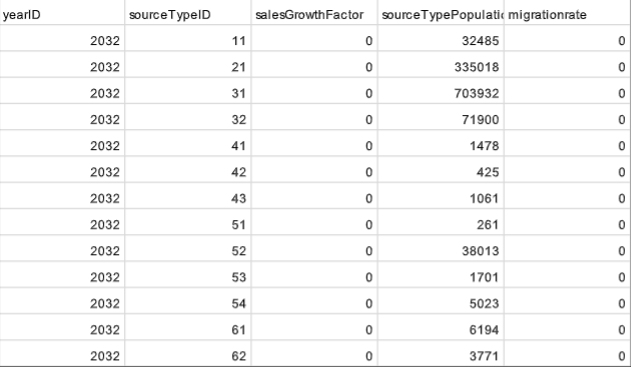

In [28]:
#Screenshot of Kip's example file for Salt Lake County
%matplotlib inline
from IPython.display import Image
Image('SourceTypeScreenshot.PNG')

In [29]:
# Create Vehicle Population Distribution File

# JARED: Ask Shauna about pop factor year file she linked in the doc. Doesn't seem to match up? Also, is this file manually created for each county? File in database seems blank. Also, are there adjustment that go into this, because it the mySQL file seems to just take it straight, but these numbes don't match?
# Shauna has been pulling straight from DAQ, Kip has been doing something TDM-specific(y).

#Create blank lists that will become data columns
source_type_county_column = []
source_type_year_column = []
source_type_sourceTypeID = []
source_type_salesGrowthFactor = []
source_type_pop_column = []
source_type_migrationRate = []

#Create list of county FIPS that don't include ogden
counties_no_ogden = list(unique_county_fips[unique_county_fips != 55980])

#Populate column lists with data
for county in counties_no_ogden:
    for source_type in unique_sourcetypeID:
        row = source_type_pop_df.loc[(source_type_pop_df['yearID']==year) & (source_type_pop_df['countyid']==49000+county) & (source_type_pop_df['sourceTypeID']==source_type)]
        source_type_year_column.append(row['yearID'].values[0])
        source_type_county_column.append(county)
        source_type_sourceTypeID.append(row['sourceTypeID'].values[0])
        source_type_salesGrowthFactor.append(0)
        source_type_pop_column.append(row['pop'].values[0])
        source_type_migrationRate.append(0)

#Map Data Column names to Data
source_type_data_columns = [source_type_year_column,source_type_county_column,source_type_sourceTypeID,source_type_salesGrowthFactor,source_type_pop_column,source_type_migrationRate]
source_type_data_column_names = ['yearID','countyid','sourceTypeID','salesGrowthFactor','pop','migrationRate']
source_type_dict = {}

for i in range(len(source_type_data_columns)):
    source_type_dict[source_type_data_column_names[i]] = source_type_data_columns[i]

#Create Vehicle Population Distribution dataframe
mv_vehpop_dist_county = pd.DataFrame(source_type_dict)

        

,yearID,countyid,sourceTypeID,pop
0,2014,49001,11,109.000
1,2015,49001,11,104.000
2,2016,49001,11,102.000
3,2017,49001,11,124.000
4,2018,49001,11,136.000
...,...,...,...,...
17714,2056,49057,62,974.196
17715,2057,49057,62,978.659
17716,2058,49057,62,983.141
17717,2059,49057,62,987.644


[    3    11    35    49    57 55980]


[3, 11, 35, 49, 57]

[2050,
 2050,
 2050,
 2050,
 2050,
 2050,
 2050,
 2050,
 2050,
 2050,
 2050,
 2050,
 2050,
 2050,
 2050,
 2050,
 2050,
 2050,
 2050,
 2050,
 2050,
 2050,
 2050,
 2050,
 2050,
 2050,
 2050,
 2050,
 2050,
 2050,
 2050,
 2050,
 2050,
 2050,
 2050,
 2050,
 2050,
 2050,
 2050,
 2050,
 2050,
 2050,
 2050,
 2050,
 2050,
 2050,
 2050,
 2050,
 2050,
 2050,
 2050,
 2050,
 2050,
 2050,
 2050,
 2050,
 2050,
 2050,
 2050,
 2050,
 2050,
 2050,
 2050,
 2050,
 2050]

,yearID,countyid,sourceTypeID,salesGrowthFactor,pop,migrationRate
0,2050,3,11,0,2411.040,0
1,2050,3,21,0,11068.000,0
2,2050,3,31,0,55367.200,0
3,2050,3,32,0,5623.230,0
4,2050,3,41,0,157.358,0
...,...,...,...,...,...,...
60,2050,57,52,0,13257.300,0
61,2050,57,53,0,2217.080,0
62,2050,57,54,0,2155.180,0
63,2050,57,61,0,1612.710,0


## 3d: Create "Speed Distribution" File 

In [30]:
# Create VHT Totals by County and Time Period (AM, MD, PM, EV)

vht_period_county = tdm[['County_FIPS','roadtype_ID2345','VHT_AM','VHT_MD','VHT_PM','VHT_EV']].copy()
vht_period_county = vht_period_county.groupby(['County_FIPS','roadtype_ID2345']).sum()



VHT_AM         VHT_MD         VHT_PM  \
County_FIPS roadtype_ID2345                                                
3           4.0                  14.852655      14.607198      10.524213   
            5.0                3680.424262    6862.283313    5671.059384   
11          4.0                6244.699669   10091.155514   10591.358624   
            5.0               30992.836268   61948.827483   58195.028742   
35          4.0               27699.283537   40475.910650   47277.654281   
            5.0              137724.721954  223589.277462  255737.009281   
49          4.0               15785.922505   24537.075481   26557.329700   
            5.0               76999.959869  138248.543022  133041.133063   
57          4.0                 697.664261    1073.590653     938.184312   
            5.0               31585.807066   56369.731404   53978.953946   
55980       4.0                  10.478088      20.555872       9.069359   
            5.0               11568.836408   19854.437316   18689.826543   

                                    VHT_EV  
County_FIPS roadtype_ID2345                 
3           4.0                   8.893973  
            5.0                5005.315880  
11          4.0                7037.841718  
            5.0               42986.590745  
35          4.0               29461.307343  
            5.0              150762.478496  
49          4.0               16703.373085  
            5.0               99100.376438  
57          4.0                 795.457515  
            5.0               39369.136416  
55980       4.0                  15.645616  
            5.0               14032.813317

In [49]:
# Create VHT Totals and Fractions by County, Speed Bin, and Time Period (AM, MD, PM, EV)

VHT_bin_AM_county = tdm[['County_FIPS','roadtype_ID2345','AM_SPD_bin','VHT_AM']].copy()
VHT_bin_AM_county = VHT_bin_AM_county.groupby(['County_FIPS','roadtype_ID2345','AM_SPD_bin']).sum()
VHT_bin_AM_county['VHT_Fract_AM'] = VHT_bin_AM_county['VHT_AM'] / vht_period_county['VHT_AM']


VHT_bin_MD_county = tdm[['County_FIPS','roadtype_ID2345','MD_SPD_bin','VHT_MD']].copy()
VHT_bin_MD_county = VHT_bin_MD_county.groupby(['County_FIPS','roadtype_ID2345','MD_SPD_bin']).sum()
VHT_bin_MD_county['VHT_Fract_MD'] = VHT_bin_MD_county['VHT_MD'] / vht_period_county['VHT_MD']


VHT_bin_PM_county = tdm[['County_FIPS','roadtype_ID2345','PM_SPD_bin','VHT_PM']].copy()
VHT_bin_PM_county = VHT_bin_PM_county.groupby(['County_FIPS','roadtype_ID2345','PM_SPD_bin']).sum()
VHT_bin_PM_county['VHT_Fract_PM'] = VHT_bin_PM_county['VHT_PM'] / vht_period_county['VHT_PM']


VHT_bin_EV_county = tdm[['County_FIPS','roadtype_ID2345','EV_SPD_bin','VHT_EV']].copy()
VHT_bin_EV_county = VHT_bin_EV_county.groupby(['County_FIPS','roadtype_ID2345','EV_SPD_bin']).sum()
VHT_bin_EV_county['VHT_Fract_EV'] = VHT_bin_EV_county['VHT_EV'] / vht_period_county['VHT_EV']


VHT_bin_AM_county = VHT_bin_AM_county.reset_index()
VHT_bin_AM_county = VHT_bin_AM_county.rename(columns = {'AM_SPD_bin':'avgSpeedBinID','roadtype_ID2345':'roadTypeID2345'})

VHT_bin_MD_county = VHT_bin_MD_county.reset_index()
VHT_bin_MD_county = VHT_bin_MD_county.rename(columns = {'MD_SPD_bin':'avgSpeedBinID','roadtype_ID2345':'roadTypeID2345'})

VHT_bin_PM_county = VHT_bin_PM_county.reset_index()
VHT_bin_PM_county = VHT_bin_PM_county.rename(columns = {'PM_SPD_bin':'avgSpeedBinID','roadtype_ID2345':'roadTypeID2345'})

VHT_bin_EV_county = VHT_bin_EV_county.reset_index()
VHT_bin_EV_county = VHT_bin_EV_county.rename(columns = {'EV_SPD_bin':'avgSpeedBinID','roadtype_ID2345':'roadTypeID2345'})

display(VHT_bin_AM_county)



,County_FIPS,roadTypeID2345,avgSpeedBinID,VHT_AM,VHT_Fract_AM
0,3,4.0,4.0,0.000000,0.000000
1,3,4.0,5.0,12.447050,0.838035
2,3,4.0,6.0,2.405605,0.161965
3,3,4.0,15.0,0.000000,0.000000
4,3,4.0,16.0,0.000000,0.000000
...,...,...,...,...,...
124,55980,5.0,5.0,1458.548891,0.126076
125,55980,5.0,6.0,2608.480927,0.225475
126,55980,5.0,7.0,3132.367989,0.270759
127,55980,5.0,8.0,1812.317971,0.156655


In [32]:
##Create template for Speed Distribution File

#Create speed bin and road type lists
speed_bins_list = list(range(1,17))
road_type_list = list(range(2,6))

#Create hourdayID list
hourdayID_list = []
for i in range(1,25):
    hourdayID_list.append(i*10+2)
    hourdayID_list.append(i*10+5)

#Create blank lists for Speed Bin Table
speed_bin_county = []
speed_bin_sourcetype = []
speed_bin_hourdayID = []
speed_bin_roadtype = []
speed_bin_speedbin = []

#Create dictionary mapping hourdayIDs to "Period"
period_dict = {}
for hourID in hourdayID_list:
    if hourID % 10 == 2:
        if hourID < 60:
            period_dict[hourID] = 'EV'
        elif hourID < 180:
            period_dict[hourID] = 'MD'
        else:
            period_dict[hourID] = 'EV'
    if hourID % 10 == 5:
        if hourID < 60:
            period_dict[hourID] = 'EV'
        elif hourID < 90:
            period_dict[hourID] = 'AM'
        elif hourID < 150:
            period_dict[hourID] = 'MD'
        elif hourID < 180:
            period_dict[hourID] = 'PM'
        else:
            period_dict[hourID] = 'EV'

#Fill lists for dataframe replica of "template" file 
for county in unique_county_fips:
    for source_type in unique_sourcetypeID:
        for hourDayID in hourdayID_list:
            for roadtype in road_type_list:
                for speedBin in speed_bins_list:
                    speed_bin_county.append(county)
                    speed_bin_sourcetype.append(source_type)
                    speed_bin_hourdayID.append(hourDayID)
                    speed_bin_roadtype.append(roadtype)
                    speed_bin_speedbin.append(speedBin)
                    

#Combine lists into replica "template" dataframe
speed_bin_data_columns = [speed_bin_county,speed_bin_sourcetype,speed_bin_roadtype,speed_bin_hourdayID,speed_bin_speedbin]
speed_bin_data_column_names = ['County_FIPS','sourceTypeID','roadTypeID2345','hourDayID','avgSpeedBinID']
speed_bin_dict = {}

for i in range(len(speed_bin_data_columns)):
    speed_bin_dict[speed_bin_data_column_names[i]] = speed_bin_data_columns[i]


speed_dist_template = pd.DataFrame(speed_bin_dict)

#Add "Period" Column to dataframe
speed_dist_template['Period'] = speed_dist_template['hourDayID'].map(period_dict)
display(speed_dist_template)


,County_FIPS,sourceTypeID,roadTypeID2345,hourDayID,avgSpeedBinID,Period
0,3,11,2,12,1,EV
1,3,11,2,12,2,EV
2,3,11,2,12,3,EV
3,3,11,2,12,4,EV
4,3,11,2,12,5,EV
...,...,...,...,...,...,...
239611,55980,62,5,245,12,EV
239612,55980,62,5,245,13,EV
239613,55980,62,5,245,14,EV
239614,55980,62,5,245,15,EV


In [33]:

#Merge each period's speed bin table onto the template
merged_speed_dist = pd.merge(speed_dist_template,VHT_bin_AM_county,how='left', on=['County_FIPS','roadTypeID2345','avgSpeedBinID'])
merged_speed_dist = pd.merge(merged_speed_dist,VHT_bin_MD_county,how='left',on=['County_FIPS','roadTypeID2345','avgSpeedBinID'])
merged_speed_dist = pd.merge(merged_speed_dist,VHT_bin_PM_county,how='left',on=['County_FIPS','roadTypeID2345','avgSpeedBinID'])
merged_speed_dist = pd.merge(merged_speed_dist,VHT_bin_EV_county,how='left',on=['County_FIPS','roadTypeID2345','avgSpeedBinID'])

# Function to select correct fraction for each row based on Period
def select_fraction(row):
    if row['Period'] == 'EV':
        return row['VHT_Fract_EV']
    elif row['Period'] == 'AM':
        return row['VHT_Fract_AM']
    elif row['Period'] == 'MD':
        return row['VHT_Fract_MD']
    else:
        return row['VHT_Fract_PM']

#Select Correct speed fraction for each row
merged_speed_dist['avgSpeedFraction'] = merged_speed_dist.apply(select_fraction, axis = 1)
mv_speed_dist_county = merged_speed_dist.drop(columns=['VHT_AM', 'VHT_Fract_AM', 'VHT_MD', 'VHT_Fract_MD', 'VHT_PM', 'VHT_Fract_PM', 'VHT_EV', 'VHT_Fract_EV', 'Period'])

#Replace Nan with 0 and set fraction to 1 for road types 2/3, speedbin 16.
mv_speed_dist_county = mv_speed_dist_county.fillna(0)
mask = (mv_speed_dist_county['roadTypeID2345'].isin([2, 3])) & (['avgSpeedBinID'] == 16)
mv_speed_dist_county.loc[mask,'avgSpeedFraction'] = 1
display(mv_speed_dist_county)




,County_FIPS,sourceTypeID,roadTypeID2345,hourDayID,avgSpeedBinID,avgSpeedFraction
0,3,11,2,12,1,0.0
1,3,11,2,12,2,0.0
2,3,11,2,12,3,0.0
3,3,11,2,12,4,0.0
4,3,11,2,12,5,0.0
...,...,...,...,...,...,...
239611,55980,62,5,245,12,0.0
239612,55980,62,5,245,13,0.0
239613,55980,62,5,245,14,0.0
239614,55980,62,5,245,15,0.0


## 3e: Create "TDM Summary Report"

In [34]:
# Create the table from which we can create summary tables
tdm_summary_temp = tdm[['County_FIPS','RoadType','roadtype_ID2345','EV_VMT_W','PM_VMT_W','MD_VMT_W','AM_VMT_W','EV_VMT_S','PM_VMT_S','MD_VMT_S','AM_VMT_S','VMT_JAN','VMT_JUL','VMT_HPMS_W','VMT_HPMS_S','HPMS_factor','Lane_miles','VHT','VHT_Delay_AM','VHT_Delay_MD','VHT_Delay_PM','VHT_Delay_EV','VHT_Delay','VMT_VC>1.0','VMT_VC>1.2']].copy()

#Calculate VHT W, S, and FF
#VHT W
tdm_summary_temp['VHT_W_EV'] = tdm_summary_temp['EV_VMT_W']/tdm['EV_SPD']
tdm_summary_temp['VHT_W_PM'] = tdm_summary_temp['PM_VMT_W']/tdm['PM_SPD']
tdm_summary_temp['VHT_W_MD'] = tdm_summary_temp['MD_VMT_W']/tdm['MD_SPD']
tdm_summary_temp['VHT_W_AM'] = tdm_summary_temp['AM_VMT_W']/tdm['AM_SPD']

#VHT S
tdm_summary_temp['VHT_S_EV'] = tdm_summary_temp['EV_VMT_S']/tdm['EV_SPD']
tdm_summary_temp['VHT_S_PM'] = tdm_summary_temp['PM_VMT_S']/tdm['PM_SPD']
tdm_summary_temp['VHT_S_MD'] = tdm_summary_temp['MD_VMT_S']/tdm['MD_SPD']
tdm_summary_temp['VHT_S_AM'] = tdm_summary_temp['AM_VMT_S']/tdm['AM_SPD']

#VHT FF
tdm_summary_temp['VHT_FF_EV'] = tdm_summary_temp['EV_VMT_W']/tdm['SFF']
tdm_summary_temp['VHT_FF_PM'] = tdm_summary_temp['PM_VMT_W']/tdm['SFF']
tdm_summary_temp['VHT_FF_MD'] = tdm_summary_temp['MD_VMT_W']/tdm['SFF']
tdm_summary_temp['VHT_FF_AM'] = tdm_summary_temp['AM_VMT_W']/tdm['SFF']

tdm_summary_temp = tdm_summary_temp.groupby(['County_FIPS','RoadType','roadtype_ID2345']).sum().round()
tdm_summary_temp = tdm_summary_temp.reset_index()
display(tdm_summary_temp)

,County_FIPS,RoadType,roadtype_ID2345,EV_VMT_W,PM_VMT_W,MD_VMT_W,AM_VMT_W,EV_VMT_S,PM_VMT_S,MD_VMT_S,...,VHT_W_MD,VHT_W_AM,VHT_S_EV,VHT_S_PM,VHT_S_MD,VHT_S_AM,VHT_FF_EV,VHT_FF_PM,VHT_FF_MD,VHT_FF_AM
0,3,4.0,4.0,209.0,237.0,333.0,302.0,315.0,353.0,503.0,...,15.0,15.0,13.0,16.0,22.0,23.0,9.0,10.0,14.0,13.0
1,3,5.0,5.0,169687.0,182019.0,228787.0,126615.0,209104.0,225013.0,282076.0,...,5538.0,3077.0,4882.0,5740.0,6710.0,3747.0,4031.0,4283.0,5428.0,2965.0
2,3,55.0,5.0,21011.0,20590.0,28519.0,13046.0,25085.0,24441.0,34012.0,...,2211.0,1011.0,1945.0,1895.0,2637.0,1208.0,973.0,954.0,1324.0,603.0
3,11,4.0,4.0,452516.0,533079.0,636935.0,380049.0,515965.0,608617.0,726813.0,...,10091.0,6245.0,8012.0,12104.0,11493.0,7130.0,7034.0,8114.0,9840.0,5844.0
4,11,5.0,5.0,955468.0,1039257.0,1287735.0,649755.0,1055495.0,1148512.0,1422520.0,...,43622.0,22717.0,32361.0,49244.0,48006.0,25008.0,29176.0,31596.0,39201.0,19638.0
5,11,55.0,5.0,253538.0,249459.0,340415.0,154033.0,281322.0,276558.0,377334.0,...,26389.0,11941.0,21808.0,21439.0,29251.0,13247.0,13615.0,13424.0,18326.0,8276.0
6,35,4.0,4.0,1962011.0,1829298.0,2448200.0,1405162.0,2216531.0,2078899.0,2767803.0,...,40476.0,27699.0,33183.0,53543.0,45496.0,31126.0,29369.0,26978.0,36547.0,20856.0
7,35,5.0,5.0,3660101.0,4547283.0,5114089.0,2820935.0,4026053.0,4999017.0,5618120.0,...,177066.0,115934.0,127494.0,240787.0,193399.0,126622.0,115523.0,144344.0,162322.0,88843.0
8,35,55.0,5.0,620491.0,636106.0,840703.0,394206.0,682220.0,698931.0,923557.0,...,65171.0,30559.0,52885.0,54181.0,71594.0,33572.0,34246.0,35169.0,46523.0,21791.0
9,49,4.0,4.0,1015627.0,1053821.0,1398122.0,802184.0,1126956.0,1168712.0,1550931.0,...,24537.0,15786.0,18494.0,29363.0,27145.0,17461.0,16676.0,17163.0,22889.0,13100.0


In [35]:
#Add more columns
tdm_summary_temp['Pct_Delay'] = tdm_summary_temp['VHT_Delay'] / tdm_summary_temp['VHT']
tdm_summary_temp['Pct_VC>1.0'] = tdm_summary_temp['VMT_VC>1.0'] / (tdm_summary_temp['EV_VMT_W']+tdm_summary_temp['PM_VMT_W']+tdm_summary_temp['MD_VMT_W']+tdm_summary_temp['AM_VMT_W'])
tdm_summary_temp['Pct_VC>1.2'] = tdm_summary_temp['VMT_VC>1.2'] / (tdm_summary_temp['EV_VMT_W']+tdm_summary_temp['PM_VMT_W']+tdm_summary_temp['MD_VMT_W']+tdm_summary_temp['AM_VMT_W'])
tdm_summary_temp['Speed_AM_W'] = tdm_summary_temp['AM_VMT_W'] / tdm_summary_temp['VHT_W_AM']
tdm_summary_temp['Speed_PM_W'] = tdm_summary_temp['PM_VMT_W'] / tdm_summary_temp['VHT_W_PM']
tdm_summary_temp['Speed_EV_W'] = tdm_summary_temp['EV_VMT_W'] / tdm_summary_temp['VHT_W_EV']
tdm_summary_temp['Year'] = year

#RoadtypeID2345 dictionary to map roadtype ID to "road"
road_dict = {
    4: 'Freeway',
    5: 'Arterial'
}
tdm_summary_temp['road'] = tdm_summary_temp['roadtype_ID2345'].map(road_dict)

tdm_summary_temp = pd.merge(tdm_summary_temp,hpms_df[['County_FIPS','GeoID_text']],how='left',on='County_FIPS')
tdm_summary_temp.rename(columns={'GeoID_text':'Area'}, inplace=True)
display(tdm_summary_temp)

,County_FIPS,RoadType,roadtype_ID2345,EV_VMT_W,PM_VMT_W,MD_VMT_W,AM_VMT_W,EV_VMT_S,PM_VMT_S,MD_VMT_S,...,VHT_FF_AM,Pct_Delay,Pct_VC>1.0,Pct_VC>1.2,Speed_AM_W,Speed_PM_W,Speed_EV_W,Year,road,Area
0,3,4.0,4.0,209.0,237.0,333.0,302.0,315.0,353.0,503.0,...,13.0,0.061224,0.000000,0.000000,20.133333,21.545455,23.222222,2050,Freeway,BE
1,3,5.0,5.0,169687.0,182019.0,228787.0,126615.0,209104.0,225013.0,282076.0,...,2965.0,0.037837,0.000953,0.000000,41.148846,38.587874,42.085069,2050,Arterial,BE
2,3,55.0,5.0,21011.0,20590.0,28519.0,13046.0,25085.0,24441.0,34012.0,...,603.0,0.000000,0.000000,0.000000,12.904055,12.901003,12.898097,2050,Arterial,BE
3,11,4.0,4.0,452516.0,533079.0,636935.0,380049.0,515965.0,608617.0,726813.0,...,5844.0,0.093744,0.033749,0.000335,60.856525,50.333207,64.296107,2050,Freeway,DA
4,11,5.0,5.0,955468.0,1039257.0,1287735.0,649755.0,1055495.0,1148512.0,1422520.0,...,19638.0,0.148561,0.076887,0.019293,28.602148,23.212727,32.531000,2050,Arterial,DA
5,11,55.0,5.0,253538.0,249459.0,340415.0,154033.0,281322.0,276558.0,377334.0,...,8276.0,0.000000,0.000000,0.000000,12.899506,12.899938,12.900071,2050,Arterial,DA
6,35,4.0,4.0,1962011.0,1829298.0,2448200.0,1405162.0,2216531.0,2078899.0,2767803.0,...,20856.0,0.215397,0.117130,0.010939,50.729701,38.692373,66.596891,2050,Freeway,SL
7,35,5.0,5.0,3660101.0,4547283.0,5114089.0,2820935.0,4026053.0,4999017.0,5618120.0,...,88843.0,0.188948,0.078408,0.024134,24.332249,20.616241,31.412862,2050,Arterial,SL
8,35,55.0,5.0,620491.0,636106.0,840703.0,394206.0,682220.0,698931.0,923557.0,...,21791.0,0.000000,0.000000,0.000000,12.899833,12.899880,12.900021,2050,Arterial,SL
9,49,4.0,4.0,1015627.0,1053821.0,1398122.0,802184.0,1126956.0,1168712.0,1550931.0,...,13100.0,0.164589,0.063224,0.013689,50.816166,39.681478,60.805065,2050,Freeway,UT


## 3f: Create Summary Tables
### Summary A: Freeways, Arterials, and Locals are separated
### Summary B: Freeways, Arterials, and Locals are combined

In [36]:
# Create separated table

_tdm_summary_AFL = tdm_summary_temp[['Area','Year','County_FIPS','road','RoadType','Lane_miles','VMT_JAN','VMT_JUL','HPMS_factor','VMT_HPMS_W','VMT_HPMS_S','Speed_AM_W','Speed_PM_W','Speed_EV_W','VHT_Delay','Pct_Delay','Pct_VC>1.0','Pct_VC>1.2']].copy()
_tdm_summary_AFL = _tdm_summary_AFL.groupby(['County_FIPS','RoadType']).sum()
display(_tdm_summary_AFL)

Area  Year      road  Lane_miles     VMT_JAN     VMT_JUL  \
County_FIPS RoadType                                                            
3           4.0        BE  2050   Freeway       100.0      1039.0      1564.0   
            5.0        BE  2050  Arterial       239.0    692795.0    859847.0   
            55.0       BE  2050  Arterial      1486.0     79694.0     95446.0   
11          4.0        DA  2050   Freeway       542.0   1843295.0   2105679.0   
            5.0        DA  2050  Arterial       858.0   3593644.0   3968608.0   
            55.0       DA  2050  Arterial      4040.0    912068.0   1011038.0   
35          4.0        SL  2050   Freeway      1386.0   6989353.0   7928332.0   
            5.0        SL  2050  Arterial      3217.0  14879823.0  16358454.0   
            55.0       SL  2050  Arterial     11717.0   2291262.0   2517062.0   
49          4.0        UT  2050   Freeway       833.0   3875257.0   4301275.0   
            5.0        UT  2050  Arterial      3345.0  10360794.0  11827947.0   
            55.0       UT  2050  Arterial     12044.0   1502888.0   1683065.0   
57          4.0        WE  2050   Freeway       155.0    210314.0    246880.0   
            5.0        WE  2050  Arterial       891.0   4126947.0   4699728.0   
            55.0       WE  2050  Arterial      4795.0    645858.0    743347.0   
55980       4.0        OG  2050   Freeway        20.0      2034.0      2319.0   
            5.0        OG  2050  Arterial       279.0   1370430.0   1504521.0   
            55.0       OG  2050  Arterial      1075.0    174390.0    191327.0   

                      HPMS_factor  VMT_HPMS_W  VMT_HPMS_S  Speed_AM_W  \
County_FIPS RoadType                                                    
3           4.0              77.0       840.0      1265.0   20.133333   
            5.0             585.0    689816.0    856150.0   41.148846   
            55.0            925.0    141720.0    169732.0   12.904055   
11          4.0             769.0   1774909.0   2027559.0   60.856525   
            5.0            3142.0   3874667.0   4278953.0   28.602148   
            55.0           3743.0   2208390.0   2448027.0   12.899506   
35          4.0            2179.0   6726553.0   7630227.0   50.729701   
            5.0           10144.0  15149148.0  16654542.0   24.332249   
            55.0          16855.0   6199011.0   6809911.0   12.899833   
49          4.0            1398.0   4002366.0   4442357.0   50.816166   
            5.0           10355.0   9292596.0  10608485.0   31.042637   
            55.0          17967.0   4159243.0   4657883.0   12.900238   
57          4.0             214.0    200913.0    235844.0   65.638968   
            5.0            2716.0   4046472.0   4608083.0   30.035374   
            55.0           4963.0   1514795.0   1743446.0   12.899501   
55980       4.0              33.0      1790.0      2041.0   49.800000   
            5.0            1030.0   1360974.0   1494140.0   27.005891   
            55.0           2751.0    624596.0    685256.0   12.902156   

                      Speed_PM_W  Speed_EV_W  VHT_Delay  Pct_Delay  \
County_FIPS RoadType                                                 
3           4.0        21.545455   23.222222        3.0   0.061224   
            5.0        38.587874   42.085069      657.0   0.037837   
            55.0       12.901003   12.898097        0.0   0.000000   
11          4.0        50.333207   64.296107     3184.0   0.093744   
            5.0        23.212727   32.531000    20870.0   0.148561   
            55.0       12.899938   12.900071        0.0   0.000000   
35          4.0        38.692373   66.596891    31214.0   0.215397   
            5.0        20.616241   31.412862   119053.0   0.188948   
            55.0       12.899880   12.900021        0.0   0.000000   
49          4.0        39.681478   60.805065    13757.0   0.164589   
            5.0        27.393874   34.495523    35751.0   0.099091   
            55.0       12.900

In [37]:
_tdm_summary_AF = tdm_summary_temp[['Area','Year','County_FIPS','road','Lane_miles','VMT_JAN','VMT_JUL','HPMS_factor','VMT_HPMS_W','VMT_HPMS_S','Speed_AM_W','Speed_PM_W','Speed_EV_W','VHT_Delay','Pct_Delay','Pct_VC>1.0','Pct_VC>1.2']].copy()
_tdm_summary_AF = _tdm_summary_AF.groupby(['County_FIPS','road']).sum()
display(_tdm_summary_AF)

Area  Year  Lane_miles     VMT_JAN     VMT_JUL  \
County_FIPS road                                                       
3           Arterial  BEBE  4100      1725.0    772489.0    955293.0   
            Freeway     BE  2050       100.0      1039.0      1564.0   
11          Arterial  DADA  4100      4898.0   4505712.0   4979646.0   
            Freeway     DA  2050       542.0   1843295.0   2105679.0   
35          Arterial  SLSL  4100     14934.0  17171085.0  18875516.0   
            Freeway     SL  2050      1386.0   6989353.0   7928332.0   
49          Arterial  UTUT  4100     15389.0  11863682.0  13511012.0   
            Freeway     UT  2050       833.0   3875257.0   4301275.0   
57          Arterial  WEWE  4100      5686.0   4772805.0   5443075.0   
            Freeway     WE  2050       155.0    210314.0    246880.0   
55980       Arterial  OGOG  4100      1354.0   1544820.0   1695848.0   
            Freeway     OG  2050        20.0      2034.0      2319.0   

                      HPMS_factor  VMT_HPMS_W  VMT_HPMS_S  Speed_AM_W  \
County_FIPS road                                                        
3           Arterial       1510.0    831536.0   1025882.0   54.052902   
            Freeway          77.0       840.0      1265.0   20.133333   
11          Arterial       6885.0   6083057.0   6726980.0   41.501654   
            Freeway         769.0   1774909.0   2027559.0   60.856525   
35          Arterial      26999.0  21348159.0  23464453.0   37.232082   
            Freeway        2179.0   6726553.0   7630227.0   50.729701   
49          Arterial      28322.0  13451839.0  15266368.0   43.942874   
            Freeway        1398.0   4002366.0   4442357.0   50.816166   
57          Arterial       7679.0   5561267.0   6351529.0   42.934875   
            Freeway         214.0    200913.0    235844.0   65.638968   
55980       Arterial       3781.0   1985570.0   2179396.0   39.908047   
            Freeway          33.0      1790.0      2041.0   49.800000   

                      Speed_PM_W  Speed_EV_W  VHT_Delay  Pct_Delay  \
County_FIPS road                                                     
3           Arterial   51.488876   54.983166      657.0   0.037837   
            Freeway    21.545455   23.222222        3.0   0.061224   
11          Arterial   36.112665   45.431071    20870.0   0.148561   
            Freeway    50.333207   64.296107     3184.0   0.093744   
35          Arterial   33.516121   44.312883   119053.0   0.188948   
            Freeway    38.692373   66.596891    31214.0   0.215397   
49          Arterial   40.293905   47.395366    35755.0   0.099137   
            Freeway    39.681478   60.805065    13757.0   0.164589   
57          Arterial   38.774786   47.803629    19550.0   0.132969   
            Freeway    59.591684   66.169811      126.0   0.035949   
55980       Arterial   37.059549   44.903625     6955.0   0.129719   
            Freeway    48.000000   33.562500        2.0   0.035714   

                      Pct_VC>1.0  Pct_VC>1.2  
County_FIPS road                              
3           Arterial    0.000953    0.000000  
            Freeway     0.000000    0.000000  
11          Arterial    0.076887    0.019293  
            Freeway     0.033749    0.000335  
35          Arterial    0.078408    0.024134  
            Freeway     0.117130    0.010939  
49          Arterial    0.037602    0.010554  
            Freeway     0.063224    0.013689  
57          Arterial    0.055182    0.013495  
            Freeway     0.000000    0.000000  
55980       Arterial    0.056778    0.014080  
            Freeway     0.000000    0.000000

# 4: Create .csv files

In [ ]:
#Create outupt .csv files
#mv_road_dist_county.to_csv('1MV_Road_Dist_County.csv')
#mv_vmtbyveh_dist_county.to_csv('2mv_vmt_byveh_dist_county.csv')
#mv_vehpop_dist_county.to_csv('3mv_vehpop_dist_county.csv')
#mv_speed_dist_county.to_csv('4mv_speed_dist_county.csv')
#_tdm_summary_AFL.to_csv('tdm_summary_afl.csv')
#_tdm_summary_AF.to_csv('tdm_summary_af.csv')

### Create a separate database for each pollutant type in each modeled year

In [38]:
#%sql sqlite:///myfirstdb.db